# Plot LIGO data

In this part of the tutorial, we will download some data from the LIGO
observatory, and plot it.

We'll download the data first:

In [3]:
!wget 'https://gwosc.org/archive/data/S5/814743552/H-H2_LOSC_4_V1-815235072-4096.hdf5'

--2026-01-27 15:01:07--  https://gwosc.org/archive/data/S5/814743552/H-H2_LOSC_4_V1-815235072-4096.hdf5
Resolving gwosc.org (gwosc.org)... 131.215.5.239
Connecting to gwosc.org (gwosc.org)|131.215.5.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 128443538 (122M) [application/octet-stream]
Saving to: ‘H-H2_LOSC_4_V1-815235072-4096.hdf5’

H-H2_LOSC_4_V1-8152 100%[===================>] 122.49M  11.5MB/s    in 11s     

2026-01-27 15:01:24 (10.8 MB/s) - ‘H-H2_LOSC_4_V1-815235072-4096.hdf5’ saved [128443538/128443538]



The initial exclaimation mark `!` tells Jupyter that the line is a shell command should be executed as though it was on the command line.
The result should be a file named `H-H2_LOSC_4_V1-815235072-4096.hdf5` in the current directory.
This file is about 123MB in size and is in a format called [HDF5],
commonly used to store scientific data.
We will use the Python `h5py` package that we installed earlier to work with this file.

[HDF5]: https://en.wikipedia.org/wiki/Hierarchical_Data_Format

In [5]:
import h5py
data = h5py.File('H-H2_LOSC_4_V1-815235072-4096.hdf5', 'r')

We can look at the dataset:

In [6]:
for k in data.keys():
    print(k)

meta
quality
strain


And:

In [7]:
for k,v in data['meta'].items():
    print(k,v)

Description <HDF5 dataset "Description": shape (), type "|S33">
DescriptionURL <HDF5 dataset "DescriptionURL": shape (), type "|S21">
Detector <HDF5 dataset "Detector": shape (), type "|S2">
Duration <HDF5 dataset "Duration": shape (), type "<i8">
GPSstart <HDF5 dataset "GPSstart": shape (), type "<i8">
Observatory <HDF5 dataset "Observatory": shape (), type "|S1">
Type <HDF5 dataset "Type": shape (), type "|S16">
UTCstart <HDF5 dataset "UTCstart": shape (), type "|S19">


That is not quite what we want:

In [8]:
for k,v in data['meta'].items():
    print(k,v[...])

Description np.bytes_(b'Strain data time series from LIGO')
DescriptionURL np.bytes_(b'http://losc.ligo.org/')
Detector np.bytes_(b'H2')
Duration 4096
GPSstart 815235072
Observatory np.bytes_(b'H')
Type np.bytes_(b'StrainTimeSeries')
UTCstart np.bytes_(b'2005-11-05T14:10:59')


Let us load some of the data into an array, and plot the array using
matplotlib:

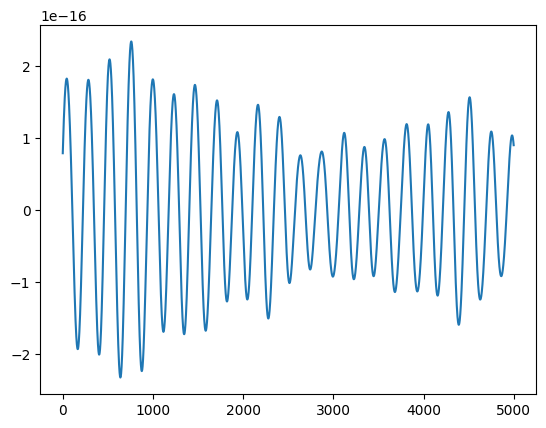

In [12]:
import matplotlib.pyplot as plt

strain = data['strain/Strain']
N = 5000
plt.plot(range(N), strain[:N])

There are many natural questions here, e.g. what exactly are we looking at? How much data is there? Why is the data in a strange file format?

This is where metadata comes in handy. While numbers are good, we cannot understand the data unless we know what they represent.
Ideally all the needed metadata is stored with the data, but this is can be difficult because the every person has a different amount of background knowledge.
The arraingement of the detectors and what is being measured is not in the data file.
This time series is measuring _strain_, which is the ratio of the lengths of two perpendicular arms.
Some other metadata is in the file, such as the time between data points:

In [18]:
dt = data['strain/Strain'].attrs['Xspacing']
print(f"{dt} seconds between samples and a sample frequency of {1/dt} hz")

0.000244140625 seconds between samples and a sample frequency of 4096.0 hz


In [20]:
n = len(strain)
print(f"There are {n} samples covering {n*dt} seconds")

There are 16777216 samples covering 4096.0 seconds


first 244.140625 seconds


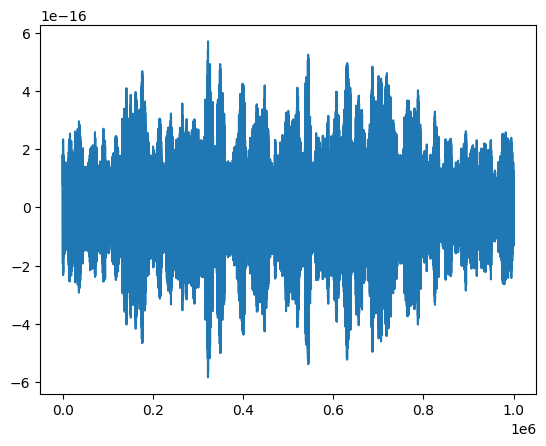

In [23]:
N = 1_000_000
plt.plot(range(N),strain[:N])
print(f"first {N*dt} seconds")